# Types of Classification Algorithms

In this note book we will be talking about 6 types of regression Machine Learning algorithms in detail. Those six Algorithms are as follows,

    1. Logistic Regression
    2. K-Nearest Neighbors (K-NN)
    3. Support Vector Machine (SVM)
    4. Kernel SVM
    5. Naive Bayes
    6. Decision Tree Classification
    7. Random Forest Classification

## 1. Logistic Regression

* Regression? But isn't this about classification? Yes and Yes, Logistic regression is a regression algorithm that can be used as a Binary classification algorithm. Meaning that it can predict either two values.

* We know what happen in regression is that it try to fit a line that best fit the data points, But in a classification problem if we try to plot a scatter plot where there are only two classes, points will be in two distinct sides of the plot and regression line would look like below.

<img src="images/logistic_regression_1.png"/>

* As you can see that, even though logistic regression cannot exactly predict the class when a age is given. It can,
    * When considering the middle portion, we can see that regression line can predict values between 0-1, We can consider this as a probability. higher the probability higher chance of being class '1' or lower the probability higher the chance of being class'0'
    * If we consider the lower half that is out of bounds,since we cannot have negative probabilities. we can predict that as people fall in that age group will definietly belong to class '0'
    * If we consider the upper half that is out of bounds,since we cannot have  probabilities higher than 1, we can predict that as people fall in that age group will definietly belong to class '1'
    
__So if we simplyfy things it would look like this,__

<img src="images/logistic_regression.png"/>

* So what we do is we use  function called sigmoid that when a function is passed to it it spits out values between 0-1 no matter what the function is,

<img src="images/logistic_regression_sigmoid.png"/>

* As any regression function do now that we have a best fitting line for this data we can predict any values between 0-1. but thats not good enough right. We want to know whether it is 0 or 1. So what Logistic regression does is when a threshold (lets say 0.5) is given it all values that are less that 0.5 are valued as 0 and everything higher than and equal to 0.5 are considered as 1.

<img src="images/final.png"/>

In [1]:
# Lets implement the logistic regression

# import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

In [3]:
# Data preprocesssing

# Import the data
data = pd.read_csv('data/Logistic Regression/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# now lets see some details regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# There is one categorical variable but, we will not be using that

In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


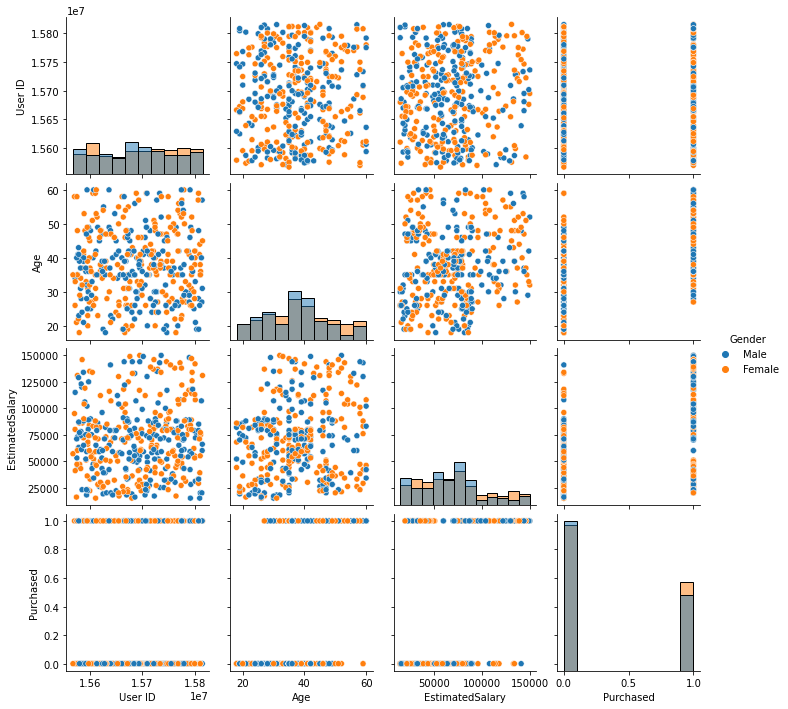

In [11]:
# it seems there are no missing values, so we dont have to do anything

# Explotary data analysis
import seaborn as sns

sns.pairplot(data=data,hue='Gender',diag_kind='hist');

In [12]:
# does not seems to have any noticeble correlation, we'll see...

In [16]:
# lets split the data to X and y
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

# Split the data into train test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# Feature scaling, Since age and salary are not of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we will fit to the Training data and use that fit to test data. Because in real life we won't get test data until after we build the model
# and also because then if we fit to test data scale would be different than what model trained upon and might lead false predictions

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train[:5]

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926]])

In [25]:
# Now we will create the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# lets predict values using this model
y_pred = model.predict(X_test)

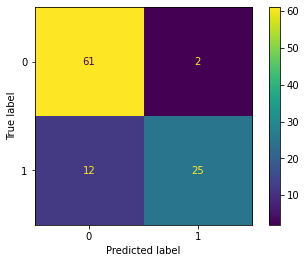

In [29]:
# Lets see how our model has perferm using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot();

In [30]:
# It seems 86 correct predictions (True Positives, True Negatives)
# And 14 incorrect predictions (False Positives,Flase Negatives)

# Lets just see the score
model.score(X_test,y_test)

0.86

In [ ]:
# has 86% accuracy that is good